<a href="https://colab.research.google.com/github/alanapooler827/ST554_Homework5/blob/main/ST554_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alana Pooler
<br>
ST 554 Homework 5

## Part 1 - Concepts

1. We discussed the “Five V's of Big Data”. Give an example of a place where you've encountered big data or a topic you are interested in where big data would arise. Specifically address the five V's for the example and whether/how they apply to your example.


    At my internship as a data scientist at a bank, I work with big data every day, so the five V's are very applicable.

    **Volume**: We store massive amounts of data, such as customer and account information, daily transactions, and more. Our data is updated every day, sometimes many times a day, so one table can have hundreds of millions of records.

    **Velocity**: Most of our data is refreshed daily, but some of our tables update more frequently, such as every hour or near real-time updates. This is necessary to ensure accurate and up to date information, especially for regulatory reporting requirements.

    **Variety**: Our data is all stored in Databricks tables, but it can come in different formats. We use medallion architecture, so we have three different stages of data. The bronze layer is raw data, silver is filtered and cleaned, and gold is aggregated and cleaned further for business use. Bronze data can be formatted very differently than silver and gold data, it is more messy and difficult to query and work with than downstream layers.

    **Value**: Our data serves many purposes across the bank. Some value it provides:
    * Helps marketing determine what campaigns are working, what aren't, and where to spend marketing budget
    * Helps deposits determine if we should adjust our interest rates
    * Gives leadership access to high-level KPIs across our deposits and loan portfolios
    * Helps detect fraud and mitigate risk

    **Varacity**: Varacity is very important in a field like banking, where we regularly handle sensitive customer information, have to comply with many laws and regulations, and have to pass internal and external audits. It is extremely important that our data is accurate, and we have many tests in place that help us ensure that. We also have a robust data validation process for reports that are used for regulatory reporting to make sure the data we are providing to the business is completely accurate.

<br>

2. Read about the database we'll use below (part IV). Give an example for each letter in the CRUD acronym in the context of this database.

    Create:

    Read:

    Update:

    Delete:


<br>

3. What is the purpose of the HAVING clause when writing SQL code?

    A HAVING clause is applied after a GROUP BY clause and operates on the grouped results, unlike a WHERE clause which operates on ungrouped results. This allows you to filter aggregated data. For example, if you find the sum of a column in your query using SUM(), you can then filter the result based on that summed field as long as you have a group by clause in your query.

## Part II - Simulation of a Sampling Distribution

We looked at using simulation to investigate the sampling distribution of $\hat p$ in the notes. We'll now look at the sampling distribution of the sample slope from an SLR model using simulation.

In [5]:
#import some modules needed
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from sklearn import linear_model

We can generate data from this SLR model by assuming values for $\beta_0$, $\beta_1$, and n, along with a sequence of x values via the following code:

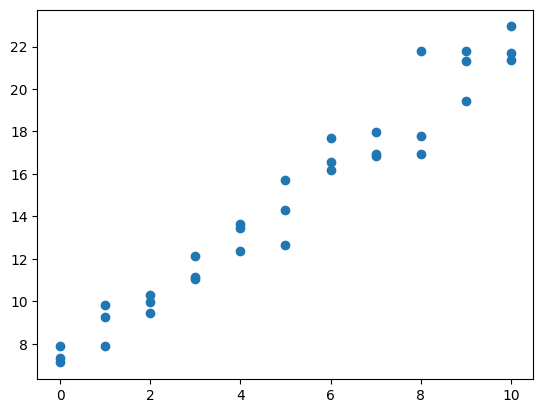

In [16]:
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33
#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)
#visualize the data
plt.scatter(x = x, y = y)
plt.show()

We can use sklearn to obtain the value of the slope.

The value of the slope for this model is 1.4745.

In [17]:
reg = linear_model.LinearRegression()
reg.fit(x.reshape(-1, 1), y)
reg.coef_[0]

np.float64(1.4745056382493755)

Now, we will repeat that same process of fitting a SLR model and finding the estimated slope 5000 times to find the 'best' slope using sklearn.

In [6]:
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33

# initialize empty list to store slope estimates
slopes = []

# use a for loop to repeat the slope estimation process 5k times
for i in range(5000):
  # create the 'responses' modeled from the line plus a random deviation
  y = beta_0 + beta_1*x + rng.standard_normal(n)

  # fit linear regression
  reg = linear_model.LinearRegression()
  reg.fit(x.reshape(-1, 1), y)

  # append slope estimates to list
  slopes.append(reg.coef_[0])

# store estimated slopes in an array
slopes = np.array(slopes)

 Create a histogram of the sample slope values you found.

 The slope found from just one model was 1.4745. This histogram of the 5000 slopes is centered around 1.5.

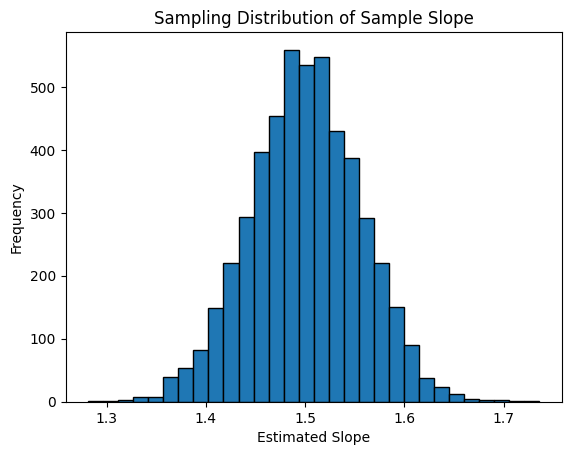

In [18]:
plt.hist(slopes, bins=30, edgecolor = 'black')
plt.xlabel("Estimated Slope")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Sample Slope")
plt.show()

Use the sampling distribution to approximate the probability of observing a sample slope larger than 1.65. This can be done by looking at the proportion of simulated values larger than 1.65.

In [15]:
# find number of slopes that are larger than 1.65
filtered_slopes = len([x for x in slopes if x > 1.65])

# divide that number with the total length of slopes array
filtered_slopes / len(slopes)

0.0038

Give an interpretation of this value and why it might be important for us in relation to a hypothesis test.

## Part III - Big Data Examples & Rare Events

5. [Consider this article about bias in machine learning models](https://international-review.icrc.org/articles/biases-machine-learning-big-data-analytics-ihl-implications-913)

* Pick an example in the article and briefly outline the issue around the data used to fit the model.

* Describe how we might augment the data or otherwise account for the bias in that situation.

6. [Consider this article about big data usage in the Earth Sciences](https://www.science.org/doi/10.1126/science.adh9607)

* Choose one of the three major areas the paper discusses. Summarize the use of big data there. Are there any biases or other missing data that might affect results? (I know this is likely difficult as most of us aren't experts in Earth science - just do your best - my goal is to try to get us to always ask questions about the data collected and used for a study!)

7. [Read through this short article:](https://allendowney.substack.com/p/superbolts?utm_source=substack&utm_medium=email)

* Mostly I just want you to read this article to understand some ways in which rare events, and statisticians, play a role in different places. To have something to put here, can you think of another variable or scenario where understanding rare events is important?

## Part IV - Querying a database

There is a database file on the assignment link called Lahman.db that is an sqlite database downloaded from [here](https://github.com/jknecht/baseball-archive-sqlite). This database has information on Major League Baseball.


First, import sqlite3 and pandas

In [22]:
import sqlite3
import pandas as pd

8. Connect to the database and then look at all of the tables in the database using read_sql() from pandas to have this returned as a data frame.

In [23]:
# make connection to database file
con = sqlite3.connect("lahman_1871-2022.sqlite")

# write query to get the schema information
get_schema = '''
        SELECT *
        FROM sqlite_schema
        WHERE type = "table";
        '''

# return result as a data frame
schema_df = pd.read_sql(get_schema, con)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,AllstarFull,AllstarFull,2,"CREATE TABLE AllstarFull (\nplayerID TEXT,\nye..."
1,table,Appearances,Appearances,3,"CREATE TABLE Appearances (\nyearID INTEGER,\nt..."
2,table,AwardsManagers,AwardsManagers,4,"CREATE TABLE AwardsManagers (\nplayerID TEXT,\..."
3,table,AwardsPlayers,AwardsPlayers,5,"CREATE TABLE AwardsPlayers (\nplayerID TEXT,\n..."
4,table,AwardsShareManagers,AwardsShareManagers,6,CREATE TABLE AwardsShareManagers (\nawardID TE...
5,table,AwardsSharePlayers,AwardsSharePlayers,7,CREATE TABLE AwardsSharePlayers (\nawardID TEX...
6,table,Batting,Batting,8,"CREATE TABLE Batting (\nplayerID TEXT,\nyearID..."
7,table,BattingPost,BattingPost,9,"CREATE TABLE BattingPost (\nyearID INTEGER,\nr..."
8,table,CollegePlaying,CollegePlaying,10,"CREATE TABLE CollegePlaying (\nplayerID TEXT,\..."
9,table,Fielding,Fielding,11,"CREATE TABLE Fielding (\nplayerID TEXT,\nyearI..."


9. Write an SQL query using pd.read_sql() that returns all the teams that played in the year 2015 with all of the corresponding columns from the Teams table.

In [ ]:
sql = '''
  SELECT *
  FROM teams
  WHERE yearID = 2015;
  '''

# return result as a data frame
teams_2015 = pd.read_sql(sql, con)
teams_2015

10. Write an SQL query using pd.read_sql() that returns all of the players in the hall of fame, the year they were voted into the hall of fame, and their category - see the HallOfFame table, the inducted variable is important here.

In [ ]:
# write query to retriever player, year, and category from HallOfFame table
sql = '''
  SELECT PlayerID, yearID, category
  FROM HallOfFame
  WHERE inducted = 'Y';
  '''

# return result as a data frame
hof = pd.read_sql(sql, con)
hof

11. Write an SQL query using pd.read_sql() that return all unique managers of the Pittsburgh Pirates (teamID of PIT) and only that information from the Managers table. Hint: Check out SELECT DISTINCT

In [ ]:
sql = '''
  SELECT DISTINCT playerID
  FROM Managers
  WHERE teamID = 'PIT';
  '''

# return result as a data frame
managers = pd.read_sql(sql, con)
managers

12. Use SQL code and the HallOfFame and Managers tables to return all of the playerIDs for the people that managed for a team that were inducted into the hall of fame. Also, programmatically report the number of such people - this can be done in pandas after returning the data from the call to pd.read_sql().

In [ ]:
sql = '''
  SELECT DISTINCT m.playerID
  FROM Managers as m
  INNER JOIN HallOfFame as h
    ON m.playerID = h.playerID
  WHERE h.inducted = 'Y';
  '''

# return result as a data frame
hof_managers = pd.read_sql(sql, con)
hof_managers

Report the number of managers that have been inducted into the hall of fame:

In [ ]:
print(f"Number of managers in Hall of Fame: {len(hof_managers)}")

13. Now use the same two tables (HallOfFame and Managers) and an SQL query to return every season managed by each manager that made it to the hall of fame (so do this with an SQL join, not via pd.merge()). You should return the playerID (manager ID), G, W, and L columns from the Managers table.

    Second, determine the overall win/loss records (sum of wins and sum of losses) for each of these hall of fame managers. Third, create a new variable that is the win/loss percentage (W/(W+L)).

    Lastly, sort the resulting data by the win/loss percentage variable (from largest to smallest). The last three parts can be done in pandas with the returned data or you can do it via SQL in your call to pd.read_sql().

In [50]:
sql = '''
  SELECT DISTINCT
    m.playerID,
    m.G,
    m.W,
    m.L
  FROM Managers as m
  INNER JOIN HallOfFame as h
    ON m.playerID = h.playerID
  WHERE h.inducted = 'Y';
  '''

# return result as a data frame
seasons = pd.read_sql(sql, con)

# calculate sum of wins and losses
seasons = seasons.groupby('playerID').agg({'W': 'sum', 'L': 'sum'})

# calculate win/loss percentage
seasons['win_loss_pct'] = seasons['W'] / (seasons['W'] + seasons['L'])

# sort values by win/loss percentage from largest to smallest
seasons = seasons.sort_values('win_loss_pct', ascending = False)
seasons

,W,L,win_loss_pct
playerID,,,
simmote01,1,0,1.000000
wrighge01,59,25,0.702381
spaldal01,78,47,0.624000
mccarjo99,2125,1333,0.614517
comisch01,840,541,0.608255
...,...,...,...
bottoji01,21,56,0.272727
applilu01,10,30,0.250000
baineha01,1,3,0.250000
